#Mountain Car MDP
This notebook shows how to generate the state-action value function for the classic mountain car problem. The correctness of the solution is verified by trajectory simulations.
###Generate state-action value function

In [1]:
using MDPs, MountainCar
mdp = MDP(state_space(20, 20), action_space(200), transition, reward)
policy = value_iteration(mdp, false, "../data/qmc_small.csv", false)

Starting value iteration...
Value iteration took 284 iterations and 1.15e+01 sec


Policy(400x100 Array{Float64,2}:
 -10.485   -10.4819  -10.4789  -10.4758  …  -10.1883  -10.1852  -10.1822
 -10.4423  -10.4392  -10.4361  -10.433      -10.1438  -10.1407  -10.1376
 -10.3888  -10.3857  -10.3826  -10.3795     -10.0866  -10.0834  -10.0803
 -10.3595  -10.3564  -10.3532  -10.3501     -10.0546  -10.0515  -10.0483
 -10.394   -10.3909  -10.3878  -10.3847     -10.0935  -10.0904  -10.0873
 -10.5304  -10.5275  -10.5246  -10.5217  …  -10.2482  -10.2453  -10.2424
 -10.7889  -10.7863  -10.7838  -10.7812     -10.541   -10.5384  -10.5359
 -11.0951  -11.0951  -11.0951  -11.0951     -10.9563  -10.9542  -10.9521
 -11.5073  -11.5073  -11.5073  -11.5073     -11.4527  -11.451   -11.4493
 -11.9874  -11.9874  -11.9874  -11.9874     -11.9862  -11.9849  -11.9836
 -12.4889  -12.4889  -12.4889  -12.4889  …  -12.4889  -12.4889  -12.4889
 -12.9624  -12.9624  -12.9624  -12.9624     -12.9624  -12.9624  -12.9624
 -13.406   -13.406   -13.406   -13.406      -13.406   -13.406   -13.406 
   ⋮              

###Visualize policy as a heat map

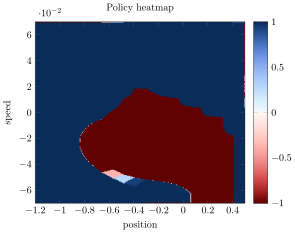

In [2]:
viz_policy(mdp, policy)

###Verify correctness
Simulate and visualize trajectory from `[position, speed] = [-0.5, 0.0]` initial state.

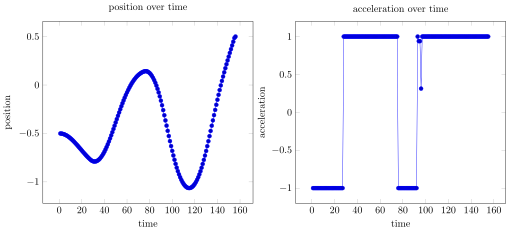

In [3]:
ss, as = simulation(mdp, policy, [-0.5, 0.0])
viz_trajectory(ss, as)